In [1]:
import pandas as pd
# Read csv file
read_file = pd.read_csv(r"C:\Users\trant\OneDrive\Documents\MIT_DA_Tri2_2023\Applied Data Mining\Assignment\processed_flight_data.csv")
flight_data = pd.DataFrame(read_file)

# Preview data
flight_data.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,Dates,Times,Timezone Offsets,Day of Week,Total Days,Total Hours,Total Minutes
0,16/4/2022,17/4/2022,ATL,BOS,PT2H29M,0,False,False,True,217.67,...,8940,947,coach,2022-04-17,12:57:00,-4.0,Sunday,0,2,29
1,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,9000,947,coach,2022-04-17,06:30:00,-4.0,Sunday,0,2,30
2,16/4/2022,17/4/2022,ATL,BOS,PT2H30M,0,False,False,True,217.67,...,9000,947,coach,2022-04-17,11:35:00,-4.0,Sunday,0,2,30
3,16/4/2022,17/4/2022,ATL,BOS,PT2H32M,0,False,False,True,217.67,...,9120,947,coach,2022-04-17,13:59:00,-4.0,Sunday,0,2,32
4,16/4/2022,17/4/2022,ATL,BOS,PT2H34M,0,False,False,True,217.67,...,9240,947,coach,2022-04-17,09:59:00,-4.0,Sunday,0,2,34


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Select features (X) and target variable (y)
features = ['Total Hours', 'Total Minutes', 'elapsedDays', 'isBasicEconomy',
            'isRefundable', 'isNonStop', 'seatsRemaining', 'totalTravelDistance']
target = 'totalFare'

X = flight_data[features]
y = flight_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Create Multivariate Random Forest Regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
# Make predictions on the test set
predictions = random_forest.predict(X_test)

In [5]:
# Evaluate the model
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mpe = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Print evaluation metrics
print(f"R-squared (R²) Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Percentage Error (MPE): {mpe}%")

R-squared (R²) Score: 0.7408854964777414
Mean Absolute Error (MAE): 70.02455852302451
Mean Percentage Error (MPE): 24.514318373684084%


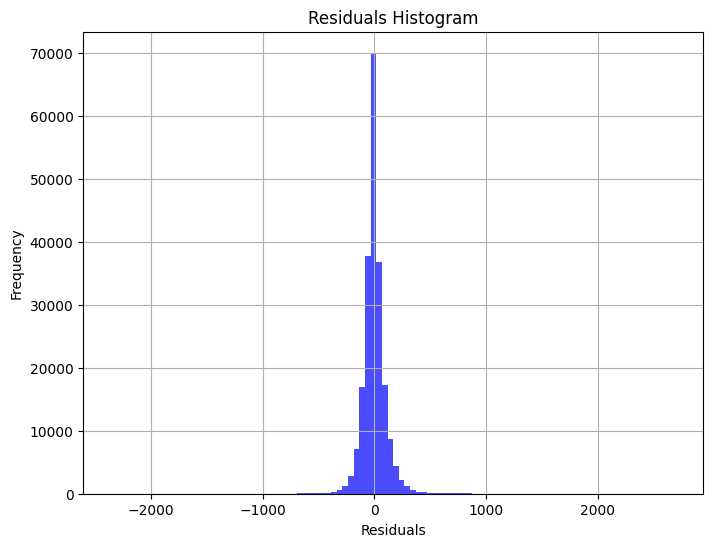

In [7]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - predictions

# Plotting the residuals using a histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=100, color='blue', alpha=0.7)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


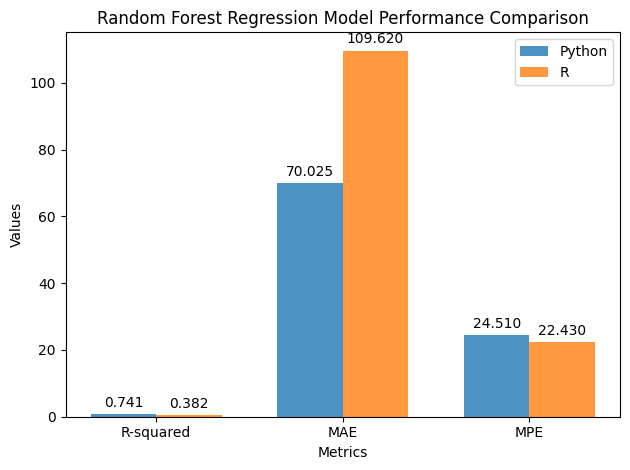

In [9]:
# Comparision

# Data
metrics = ['R-squared', 'MAE', 'MPE']
python_values = [0.7409, 70.025, 24.51]
r_values = [0.3818, 109.62, 22.43]

# Create a bar plot
bar_width = 0.35
index = range(len(metrics))

fig, ax = plt.subplots()
bar1 = ax.bar(index, python_values, bar_width, label='Python', alpha=0.8)
bar2 = ax.bar([p + bar_width for p in index], r_values, bar_width, label='R', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Random Forest Regression Model Performance Comparison')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()
